# Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Importing data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nanditapore/healthcare-diabetes")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/healthcare-diabetes


In [4]:
df = pd.read_csv('/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv', index_col=0)

# Organizing your data / Data exploration

In [5]:
# Checking the first 10 rows 
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31.0,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [6]:
# Check for missing (NaN) values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Display the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 1 to 2768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 216.2 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
df.shape

(2768, 9)

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# Impute Glucose values below 70 with the median
glucose_median = df['Glucose'].median()
df['Glucose'] = df['Glucose'].apply(lambda x: glucose_median if x < 70 else x)

# Impute SkinThickness values below 10 with the median
skin_thickness_median = df['SkinThickness'].median()
df['SkinThickness'] = df['SkinThickness'].apply(lambda x: skin_thickness_median if x < 10 else x)

# Cap Insulin at 300 μU/mL
df['Insulin'] = df['Insulin'].apply(lambda x: 300 if x > 300 else x)

# Cap SkinThickness at 60 mm
df['SkinThickness'] = df['SkinThickness'].apply(lambda x: 60 if x > 60 else x)

# Recheck summary statistics
print(df[['Glucose', 'Insulin', 'SkinThickness']].describe())

           Glucose      Insulin  SkinThickness
count  2768.000000  2768.000000    2768.000000
mean    122.629335    73.785043      27.461344
std      29.648779    91.349057       8.892846
min      71.000000     0.000000      10.000000
25%     100.000000     0.000000      23.000000
50%     117.000000    37.000000      23.000000
75%     141.000000   130.000000      32.000000
max     199.000000   300.000000      60.000000


In [12]:
# Filter out rows where BMI, SkinThickness, or BloodPressure equals 0
#df = df[(df['BMI'] != 0) & 
                #(df['SkinThickness'] != 0) & 
               # (df['BloodPressure'] != 0)]

# Display summary statistics
df.describe()

print(f"Cleaned Data Size: {df.shape}")


Cleaned Data Size: (2768, 9)


In [13]:
#filtered_data = df[(df['Glucose'] == 0) & (df['Insulin'] == 0)]
#filtered_data.describe()

In [14]:
# Get the number of distinct rows
num_distinct_rows = df.drop_duplicates().shape[0]

# Print the result
print("Number of distinct rows:", num_distinct_rows)

Number of distinct rows: 778


After removing Id from the dataset, the number of distinct rows drops from 1950 to 544. It is definitely not common for different patients to have the same values of that many factors. It is very likely that mistakes were made while inputing the data. Next we shall eliminate all duplicate values.

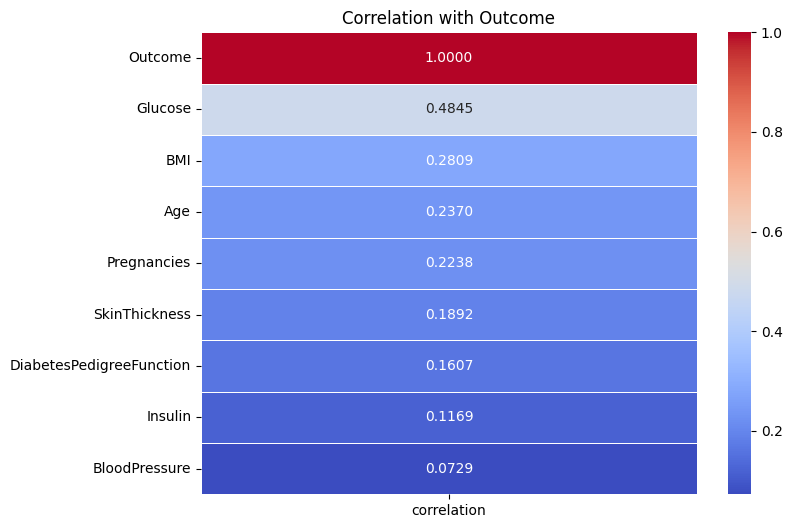

In [15]:
# Checking corrlation between data columns
correlation_with_outcome = df.corrwith(df['Outcome']).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_with_outcome, columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)

plt.title('Correlation with Outcome')
plt.show()

<Axes: >

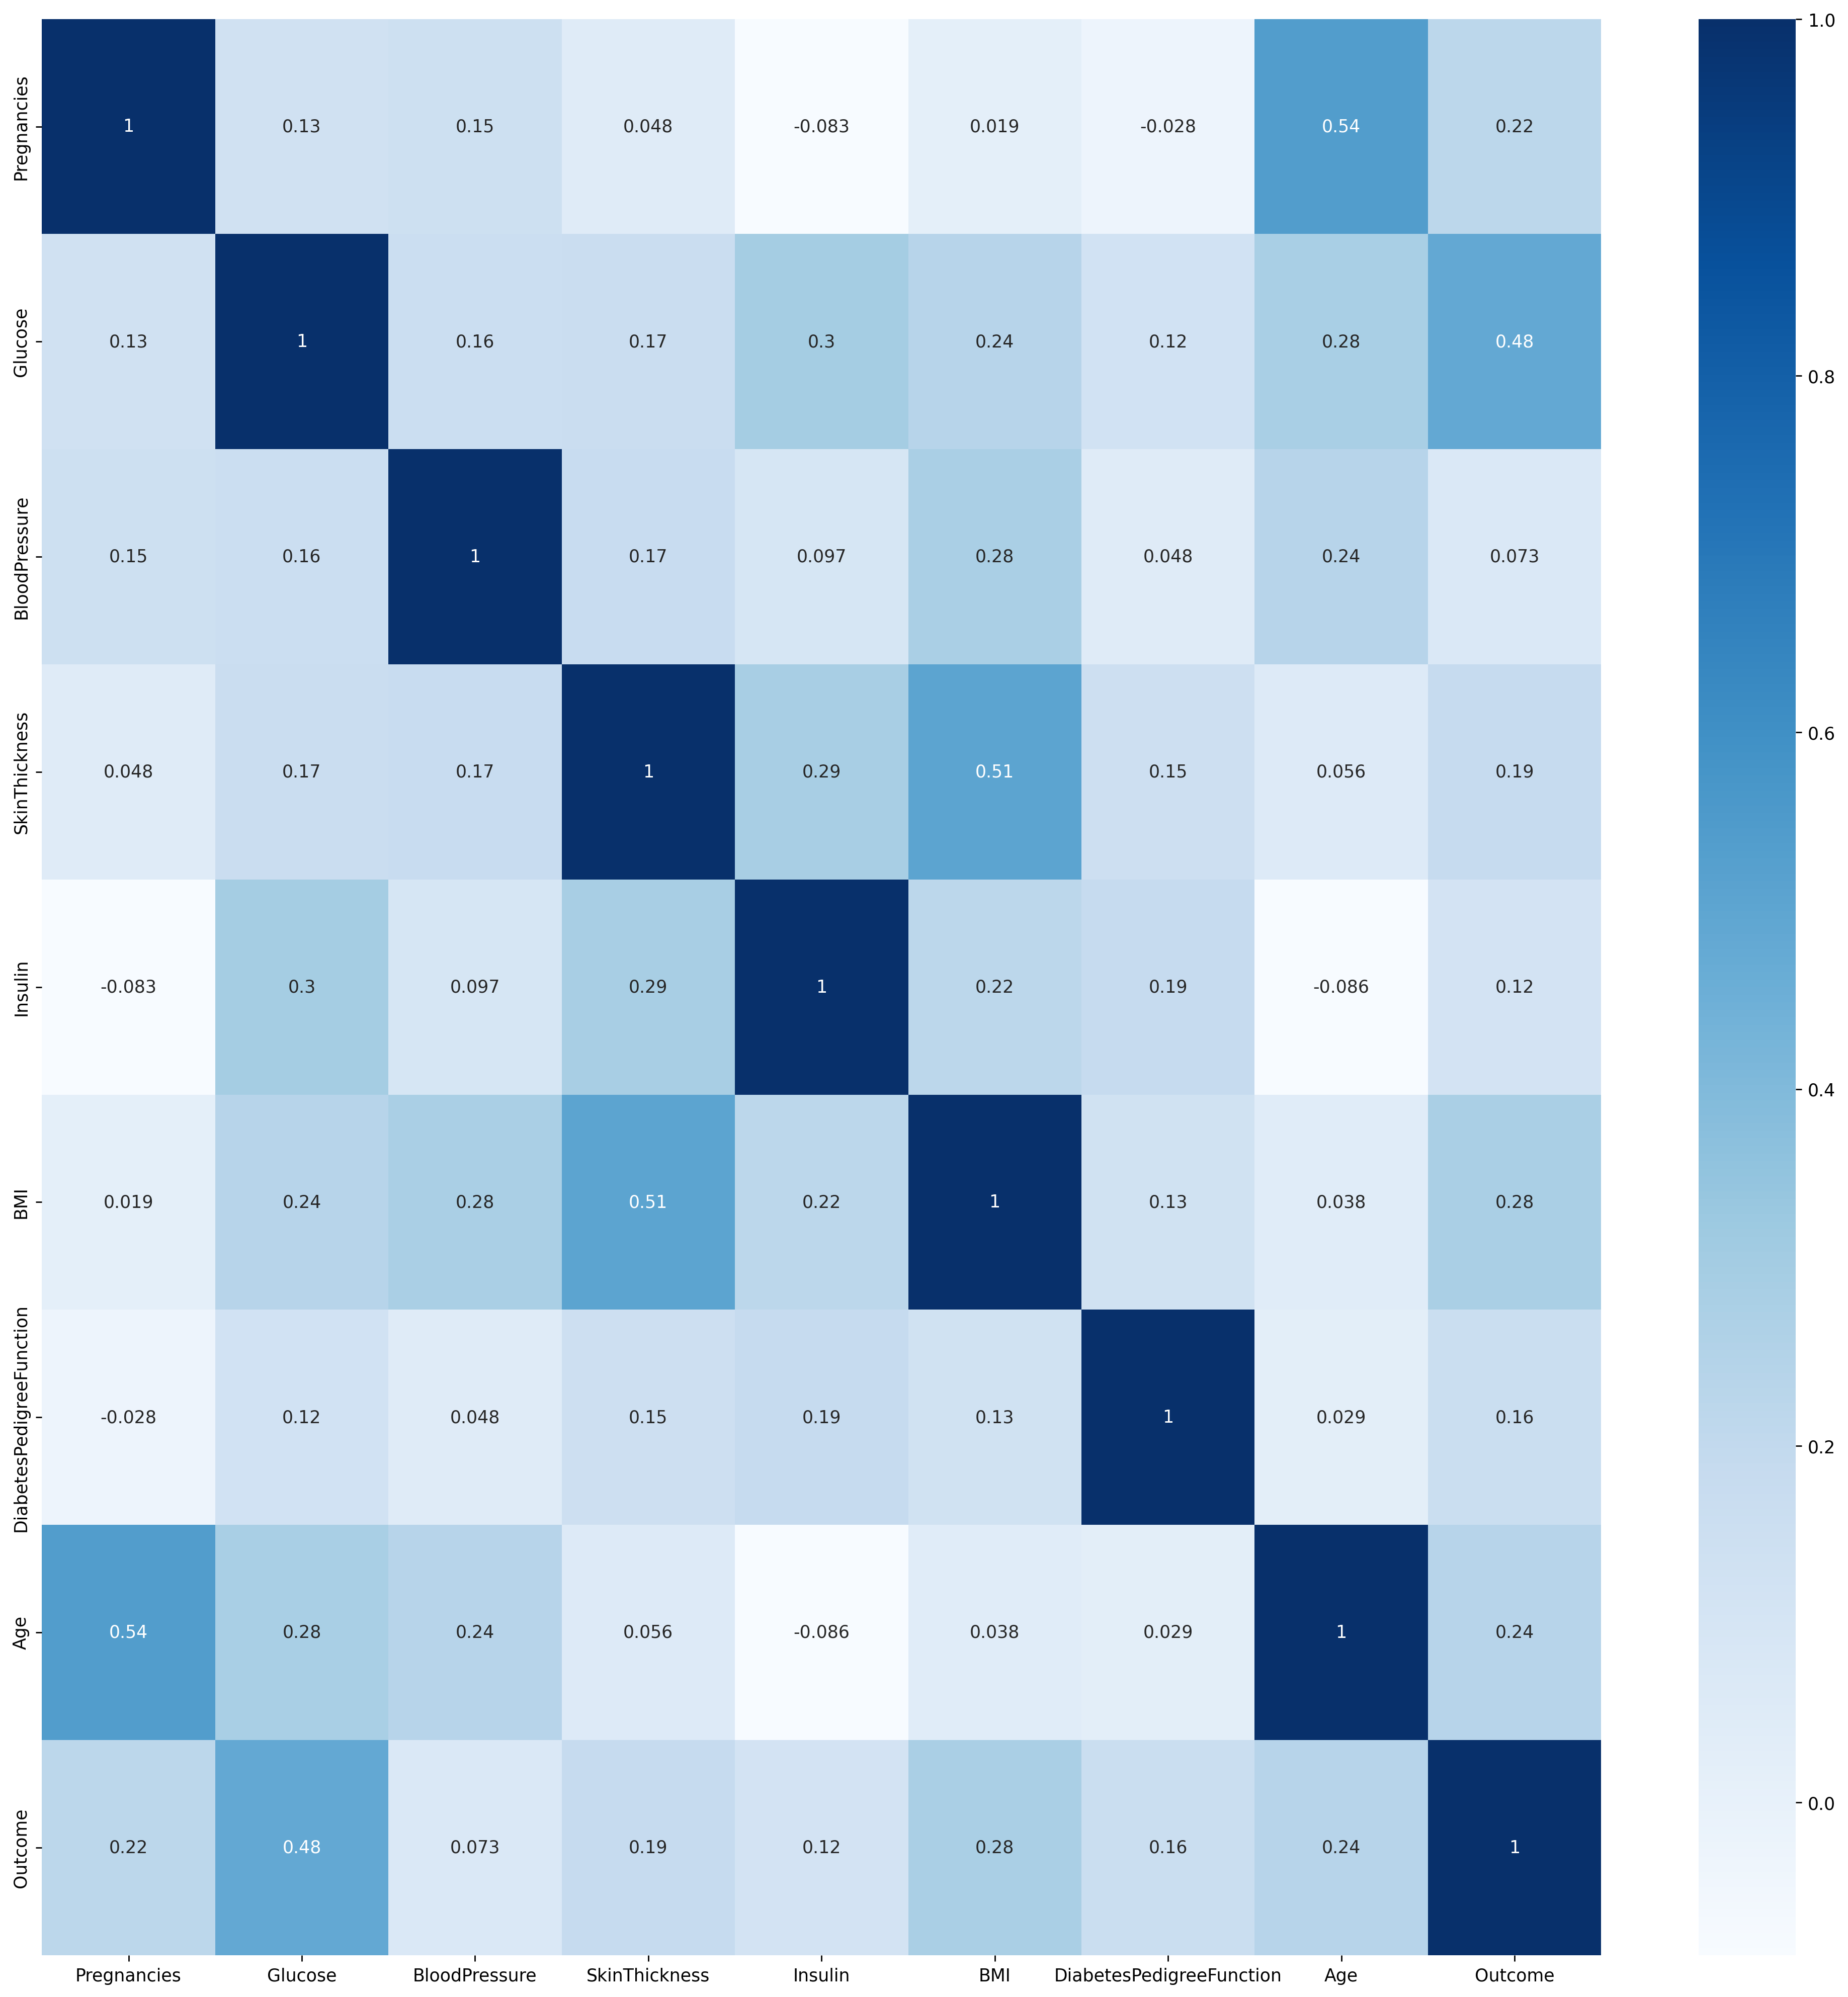

In [16]:
fig = plt.figure(figsize=(20,20), dpi=250)
sns.heatmap(df.corr(), cmap="Blues", annot=True)

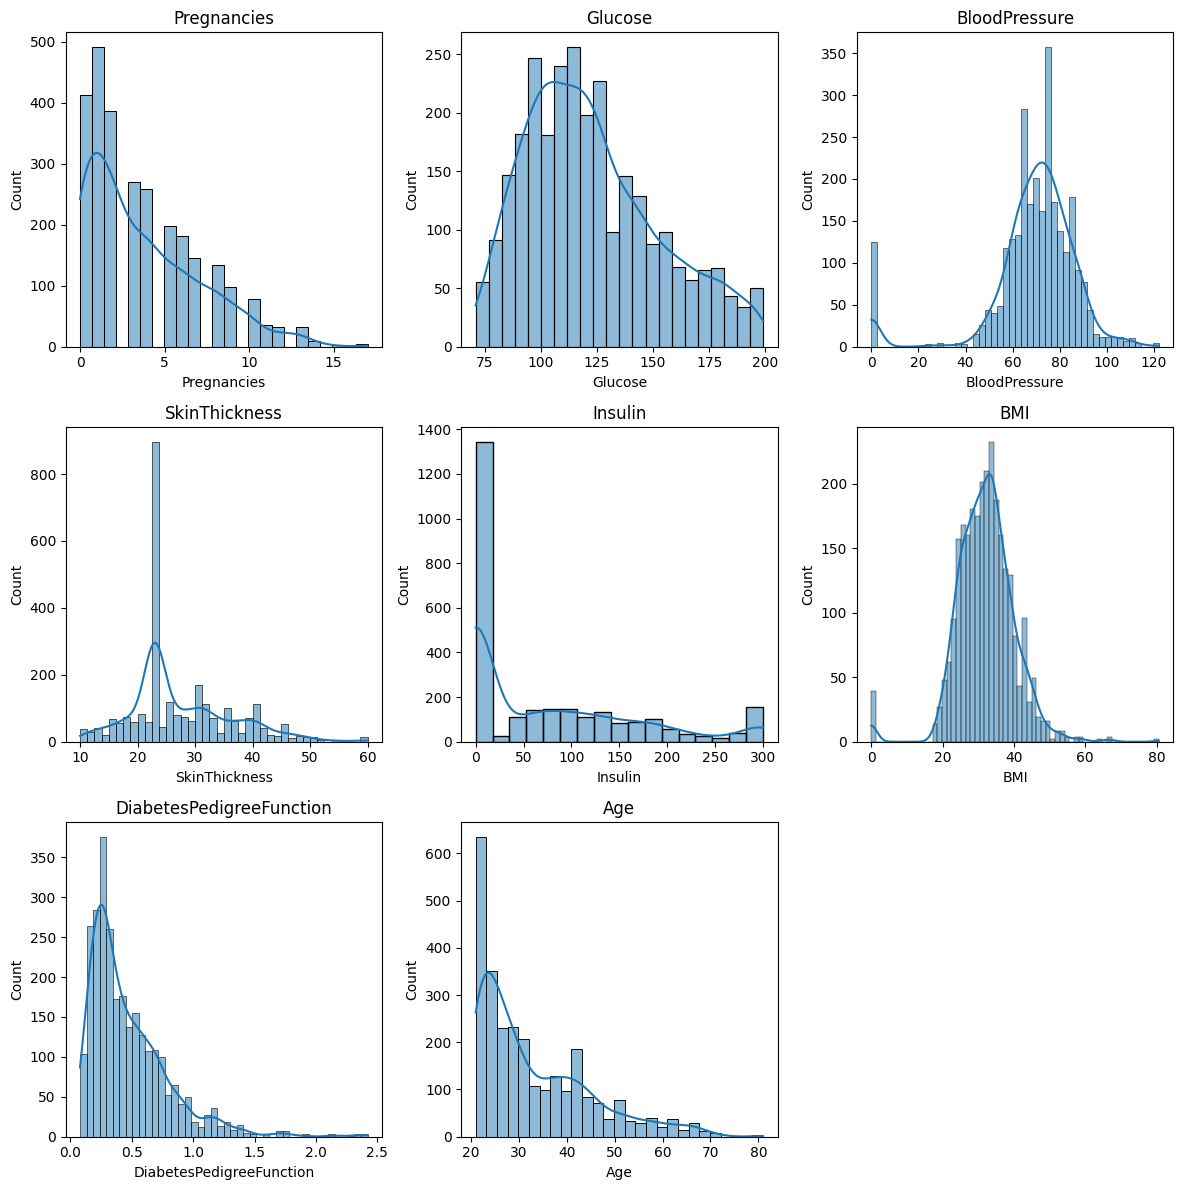

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to plot
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the figure size
plt.figure(figsize=(12, 12))

# Loop through the columns and create histograms
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)  # Creating a 3x3 subplot grid
    sns.histplot(data=df, x=col, kde=True)  # Histogram with KDE curve
    plt.title(col)  # Add a title for each plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


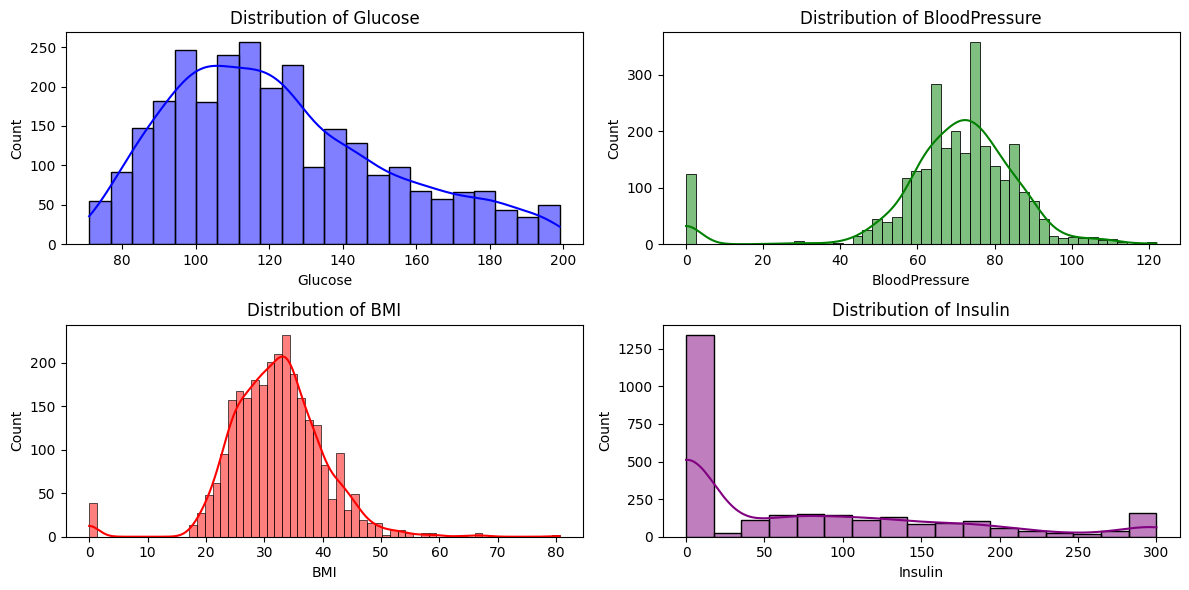

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose')

plt.subplot(2, 2, 2)
sns.histplot(df['BloodPressure'], kde=True, color='green')
plt.title('Distribution of BloodPressure')

plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], kde=True, color='red')
plt.title('Distribution of BMI')

plt.subplot(2, 2, 4)
sns.histplot(df['Insulin'], kde=True, color='purple')
plt.title('Distribution of Insulin')

plt.tight_layout()
plt.show()

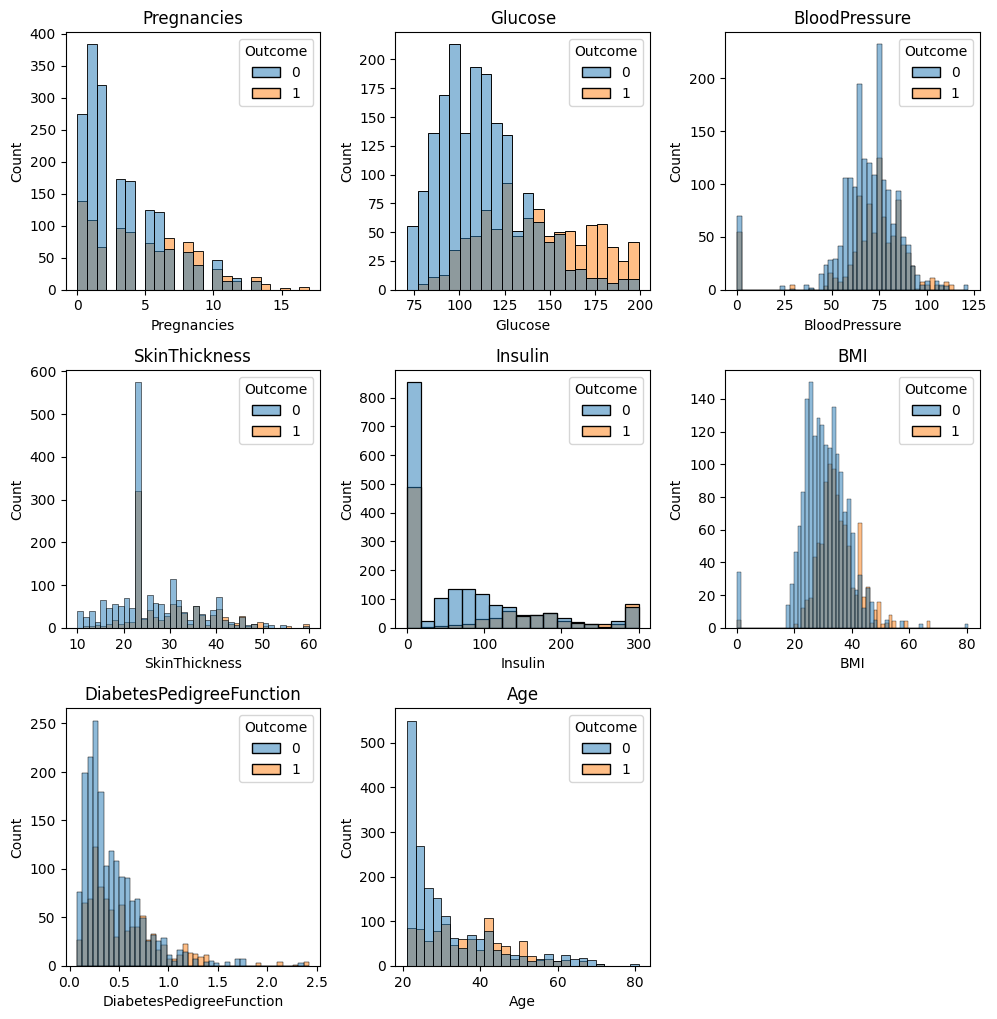

In [19]:
num_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='Outcome')

plt.tight_layout()

In [20]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=17)

In [22]:
DT_model = DecisionTreeClassifier(random_state=20)
DT_model.fit(X_train , y_train)


DecisionTreeClassifier(random_state=20)

In [23]:
DT_model.score(X_test , y_test)

0.9903730445246691

In [24]:
DT_model.score(X_train , y_train)

1.0

In [25]:
DT_pred=DT_model.predict(X_test)
DT_acc = accuracy_score(y_test ,DT_pred )

In [26]:
print(classification_report(y_test , DT_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      0.99      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Text(95.72222222222221, 0.5, 'Truh')

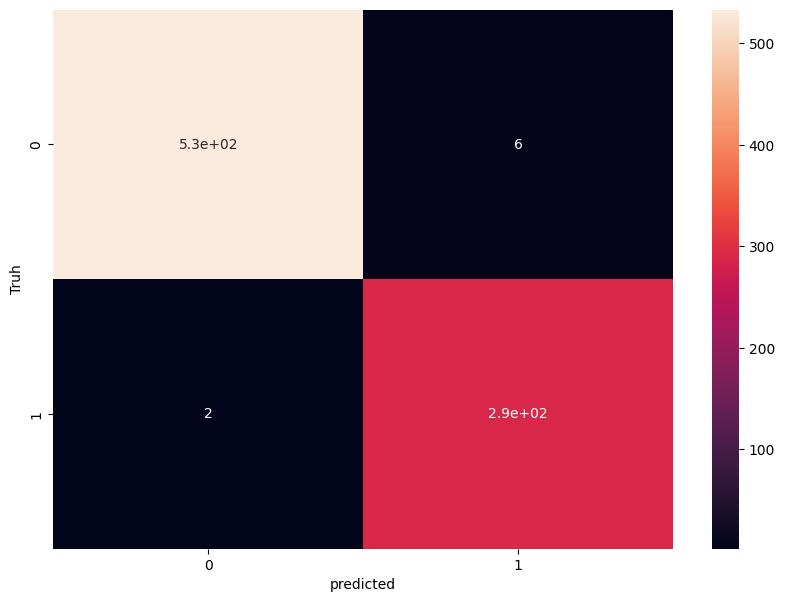

In [27]:
cm2 = confusion_matrix(y_test,DT_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')


In [28]:
print(confusion_matrix(y_test,DT_pred))

[[533   6]
 [  2 290]]


In [29]:
!pip install pydot
!pip install graphviz

In [30]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

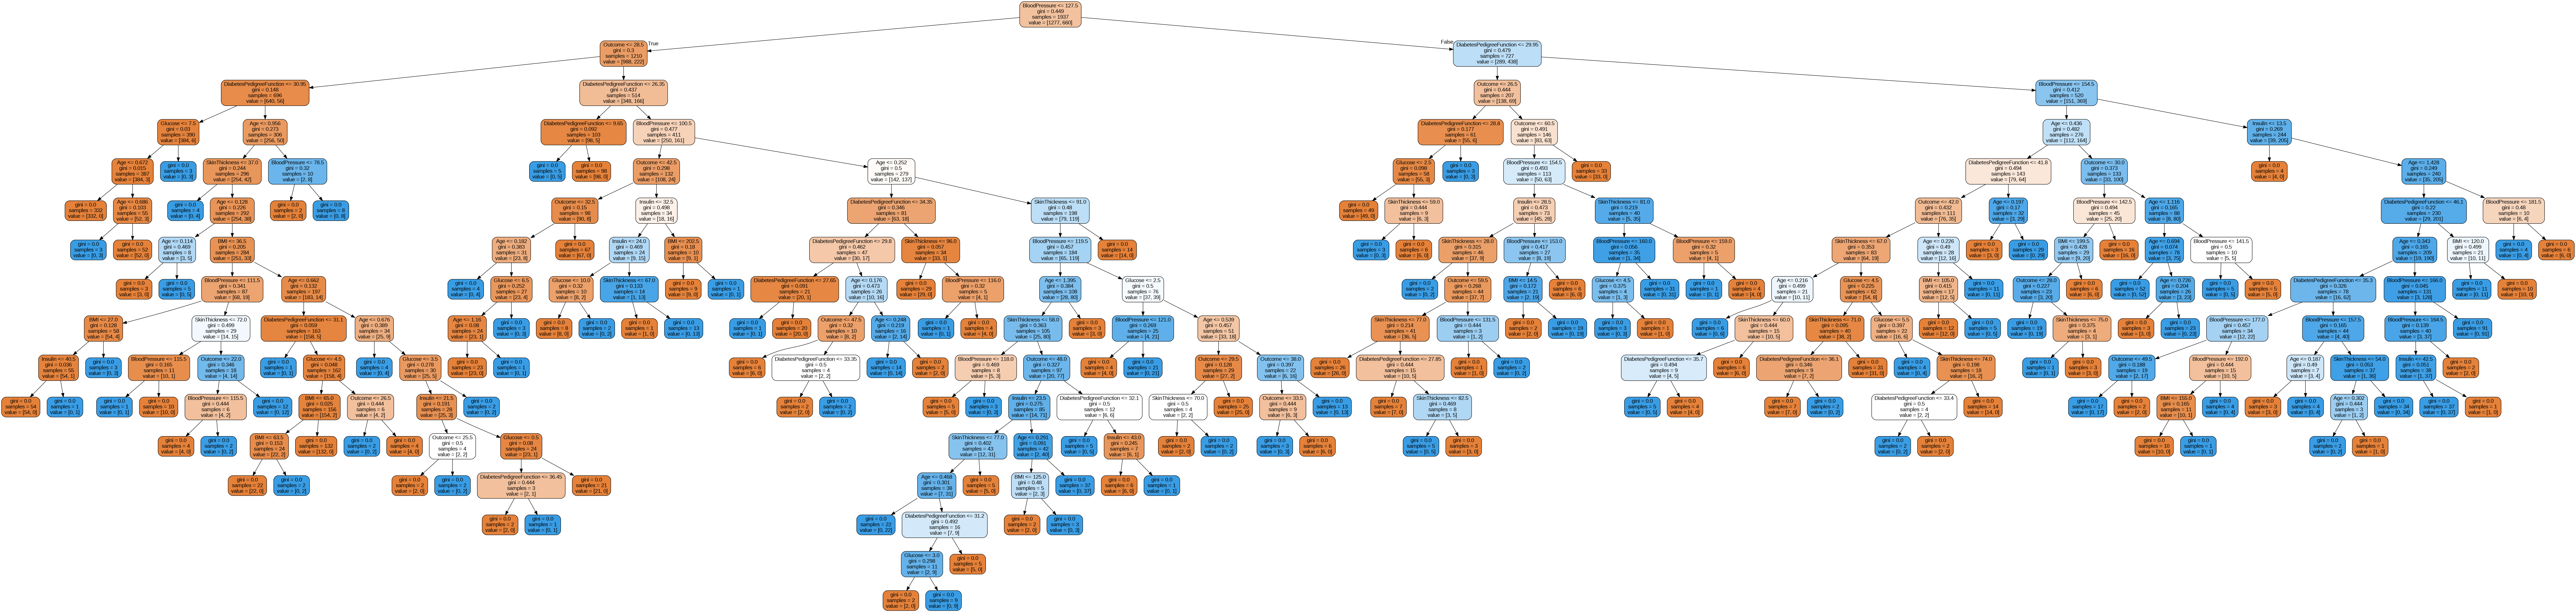

In [31]:
dot_data = StringIO()
export_graphviz(DT_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# SVM

In [32]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [33]:
svc.score(X_train , y_train)

0.7764584408879711

In [34]:
svc.score(X_test,y_test)

0.7605294825511432

In [35]:
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test , svc_pred)

In [36]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       539
           1       0.73      0.51      0.60       292

    accuracy                           0.76       831
   macro avg       0.75      0.70      0.71       831
weighted avg       0.76      0.76      0.75       831



Text(95.72222222222221, 0.5, 'Truh')

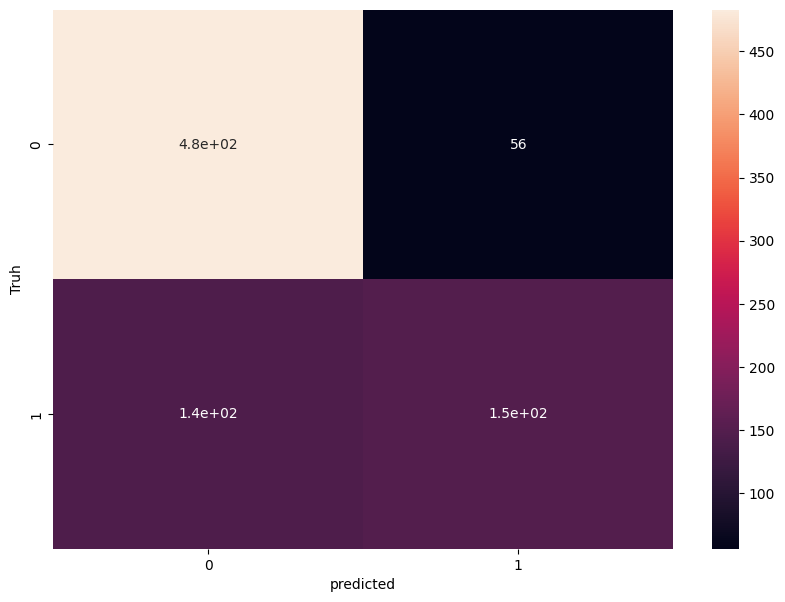

In [37]:
cm2 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Random Forest

In [38]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [39]:
RF_model.score(X_train , y_train)

1.0

In [40]:
RF_model.score(X_test , y_test)

0.9915764139590855

In [41]:
RF_pred = RF_model.predict(X_test)
RF_acc=accuracy_score(y_test , RF_pred)
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      1.00      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Text(95.72222222222221, 0.5, 'Truh')

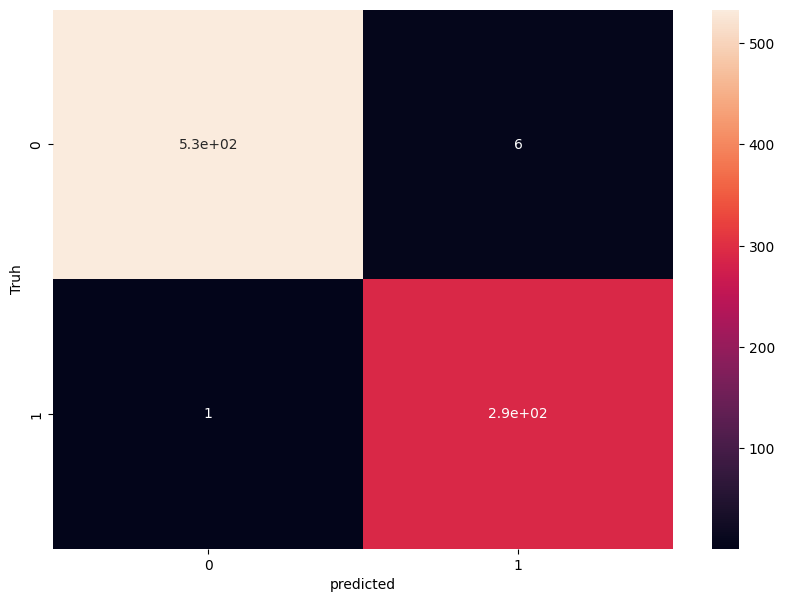

In [42]:
cm3 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Model scores

In [43]:
models=pd.DataFrame({
    'models':['Decsion_Tree','SVC','Random_Forest'],
    'scores':[DT_acc,svc_acc,RF_acc]})
models.sort_values(by='scores',ascending=False)

,models,scores
2,Random_Forest,0.991576
0,Decsion_Tree,0.990373
1,SVC,0.760529
